
# 6. Korpusannotation mit stanza

- linguistische Annotation von Korpora 
- Sequenzklassifikation (Wort &rarr; Label) 
- Tagging und Parsing
- Analyseebenen:
  - Segmentierung (*EOS, Tokenisierung, Stemming*)
  - morphologisch (*Lemmatizer, POS, morphol. Feature*)
  - syntaktisch (*Dependencies*)
  - semantisch (*NER*)
- Pipeline (*Processors*):
  - End-of-Sentence
  - Tokenization
  - Lemmatization
  - POS Tagging
  - Syntactic Parsing
  - Named Entity Recognition
  - Sentiment Analysis


- Stanza Dokumentation: https://stanfordnlp.github.io/stanza/

#### weiterführende Literatur:
- https://www.nltk.org/book/ch05.html (Tagging)
- https://www.nltk.org/book/ch06.html (Text Classification)
- https://www.nltk.org/book/ch07.html (Information Extraction)


## 1. stanza 

- stanza (*Stanford Python NLP Tools*) ist eine Python Library für die linguistische Annotation von Textdaten
- hat einen ähnlich Umfang wie die bekannte Python NLP-Library spacy
- entwickelt als moderne Python-basierte Alternative zu den bekannten Stanford CoreNLP Annotationstools (Java-basiert)
- verwendet neuronale Netze für das Training seiner Tagger und weiterer Klassifikator-Modelle
- bietet eine Vielzahl an linguistischen Annotationsebenen, u.a. POS-Tagging, Dependency-Parsing und NER (entity recognition) 
- es gibt eine Vielzahl an Modellen für verschiedenen Sprachen, diese sind trainiert auf annotierten Korpora im UD-Format ([Universal-Dependencies](https://universaldependencies.org/)): https://stanfordnlp.github.io/stanza/available_models.html
- man kann auch eigene stanza Modelle trainieren: https://stanfordnlp.github.io/stanza/training.html


---

## 2. Sequenzklassifikation 

- Annotation als Mapping von sequentiellen linguistischen Einheiten auf Annotationslabel bestimmter linguistischer Analyseebenen
- Analysen bauen aufeinander auf (Pipeline), z.B. benötigt Dependency-Parsing POS-Label


<img src="https://www.nltk.org/images/tag-context.png" width="44%">

> When we perform a language processing task based on unigrams, we are using one item of **context**. In the case of tagging, we only consider the current token, in isolation from any larger context. Given such a model, the best we can do is tag each word with its a priori most likely tag. This means we would tag a word such as *wind* with the same tag, regardless of whether it appears in the context *the wind* or *to wind*.

> An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens, as shown in 5.1. The tag to be chosen, tn, is circled, and the context is shaded in grey. In the example of an n-gram tagger shown in 5.1, we have n=3; that is, we consider the tags of the two preceding words in addition to the current word. An n-gram tagger picks the tag that is most likely in the given context.

https://www.nltk.org/book/ch05.html#fig-tag-context


### 2. 1 Regelbasierte vs. statistische/neuronale NLP-Modelle

- A: Regelbasierte Modelle
  - Regeln, die ein Modell spezifizieren
  - Beispiele:
     - Regelbasierter Tokenizer (siehe https://stanfordnlp.github.io/stanza/tokenize.html#use-spacy-for-fast-tokenization-and-sentence-segmentation)
     - Morphologischer Tagger für reguläre Ausdrücke mit NLTK: https://www.nltk.org/book/ch05.html#the-regular-expression-tagger


- B: statistische/neuronale NLP-Modelle
  - Modelle lernen Regeln (Zuordnung von Eingabe zu Ausgabe) aus Trainingsdaten
  - basierend auf Mustern in Trainingsdaten
  - verschiedene Arten von ML-Algorithmen:
     - Statistische Modelle
     - neuronale Netzwerke (Deep Learning)
 
 

 

### 2.2 Komponenten einer NLP Pipeline

> To start annotating text with Stanza, you would typically start by building a `Pipeline` that contains Processors, each fulfilling a specific NLP task you desire (e.g., tokenization, part-of-speech tagging, syntactic parsing, etc). The pipeline takes in raw text or a `Document` object that contains partial annotations, runs the specified processors in succession, and returns an annotated `Document` (see the documentation on `Document` for more information on how to extract these annotations).<br>https://stanfordnlp.github.io/stanza/pipeline.html


---

<img src="https://stanfordnlp.github.io/stanza/assets/images/pipeline.png" width=74%>

*Stanza Pipeline Overview, https://stanfordnlp.github.io/stanza/*




### 2.3 Downstream Tasks

- Named Entitiy Recognition (NER)
-  Sentiment Analysis
-  (Semantic Parsing, e.g. for Question-Answering-Systems)


---
### Beispiel 1: Information-Extraction-Pipeline 
<img src="https://www.nltk.org/images/ie-architecture.png" width="50%">

> Simple Pipeline Architecture for an Information Extraction System. This system takes the raw text of a document as its input, and generates a list of (entity, relation, entity) tuples as its output. For example, given a document that indicates that the company Georgia-Pacific is located in Atlanta, it might generate the tuple `([ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta'])`.

https://www.nltk.org/book/ch01.html#fig-sds

### Beispiel 2: Dialog-System-Pipeline
<img src="https://www.nltk.org/images/dialogue.png" width="44%">

> Simple Pipeline Architecture for a Spoken Dialogue System: Spoken input (top left) is analyzed, words are recognized, sentences are parsed and interpreted in context, application-specific actions take place (top right); a response is planned, realized as a syntactic structure, then to suitably inflected words, and finally to spoken output; different types of linguistic knowledge inform each stage of the process.

https://www.nltk.org/book/ch07.html#fig-ie-architecture:


---
## 3. Verwendung von stanza

In [1]:
import stanza


###  Download der Modelle

- Übersicht über die zur Verfügung stehenden Modelle:
https://stanfordnlp.github.io/stanza/installation_usage.html

- https://stanfordnlp.github.io/stanza/available_models.html


- Trainingsdaten im UD-Format: 
  - auch Ancient Languages Corpora (PROIEL Treebank: https://github.com/proiel )
    - z.B. Latin PROIEL Corpus: https://raw.githubusercontent.com/proiel/proiel-treebank/master/latin-nt.conll (Download)




In [3]:
#stanza.download('en')

2023-06-02 15:08:41 INFO: Downloading default packages for language: en (English) ...


2023-06-02 15:09:06 INFO: Finished downloading models and saved to ~/stanza_resources.


In [4]:
#stanza.download('en') #English
#stanza.download('de') #German


#### stanza's Neural Network Model des German-Tokenizer mit torch inspizieren:

In [12]:
##inspect neural model (tokenize.pt for de)
import torch
from os.path import expanduser
home = expanduser("~")
model_weights = torch.load(home+'/stanza_resources/de/tokenize/gsd.pt',map_location=torch.device('cpu'))
#model_weights
from itertools import islice
dict(islice(model_weights['model'].items(), 0, 2))

{'embeddings.weight': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.1684,  0.0148, -0.1964,  ..., -0.3455, -0.4633,  0.1623],
         [ 0.7807,  0.9993,  0.3276,  ...,  2.1226, -2.0106,  0.1123],
         ...,
         [-0.8969,  1.6423,  0.1080,  ..., -0.9040, -0.2237,  2.4147],
         [ 0.6745, -0.7798, -0.8825,  ..., -0.2660, -1.8693, -1.0810],
         [ 0.5926,  0.5096, -1.5175,  ...,  0.6039,  1.0388,  0.2079]]),
 'rnn.weight_ih_l0': tensor([[ 0.0177, -0.1476, -0.0815,  ...,  0.0590,  0.0593,  0.0069],
         [-0.0261,  0.0572, -0.0376,  ...,  0.0238, -0.0753,  0.2131],
         [ 0.1041, -0.0786, -0.1333,  ..., -0.8213, -0.0429,  0.0059],
         ...,
         [ 0.2776,  0.4871, -0.1580,  ..., -0.6597, -0.1040,  0.0172],
         [ 0.0984,  0.1884, -0.2566,  ...,  1.2459, -0.1326,  0.0751],
         [-0.2466,  0.0975, -0.1931,  ...,  0.6908, -0.0756, -0.0712]])}

### Pipeline und Modell laden

https://stanfordnlp.github.io/stanza/pipeline.html

In [19]:
nlp = stanza.Pipeline(lang='en', download_method=None)

2022-01-21 07:29:41 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2022-01-21 07:29:41 INFO: Use device: cpu
2022-01-21 07:29:41 INFO: Loading: tokenize
2022-01-21 07:29:41 INFO: Loading: pos
2022-01-21 07:29:41 INFO: Loading: lemma
2022-01-21 07:29:41 INFO: Loading: depparse
2022-01-21 07:29:42 INFO: Loading: sentiment
2022-01-21 07:29:42 INFO: Loading: ner
2022-01-21 07:29:43 INFO: Done loading processors!


### Document-Object

#### nlp()

- Durchführen einer Annotation auf Satz oder Text erzeugt `Document` Object

>  Document object holds the annotation of an entire document, and is automatically generated when a string is annotated by the Pipeline. It contains a collection of Sentences and entities (which are represented as Spans), and can be seamlessly translated into a native Python object.<br>https://stanfordnlp.github.io/stanza/data_objects.html

In [24]:
doc = nlp('To be or not to be.')
doc

[
  [
    {
      "id": 1,
      "text": "To",
      "lemma": "to",
      "upos": "PART",
      "xpos": "TO",
      "head": 2,
      "deprel": "mark",
      "start_char": 0,
      "end_char": 2,
      "ner": "O"
    },
    {
      "id": 2,
      "text": "be",
      "lemma": "be",
      "upos": "VERB",
      "xpos": "VB",
      "feats": "VerbForm=Inf",
      "head": 0,
      "deprel": "root",
      "start_char": 3,
      "end_char": 5,
      "ner": "O"
    },
    {
      "id": 3,
      "text": "or",
      "lemma": "or",
      "upos": "CCONJ",
      "xpos": "CC",
      "head": 4,
      "deprel": "cc",
      "start_char": 6,
      "end_char": 8,
      "ner": "O"
    },
    {
      "id": 4,
      "text": "not",
      "lemma": "not",
      "upos": "PART",
      "xpos": "RB",
      "head": 2,
      "deprel": "conj",
      "start_char": 9,
      "end_char": 12,
      "ner": "O"
    },
    {
      "id": 5,
      "text": "to",
      "lemma": "to",
      "upos": "PART",
      "xpos": "TO",
     

### Output der Annotationen

In [25]:
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}\tpos: {word.pos}' for sent in doc.sentences for word in sent.words], sep='\n')

word: To 	lemma: to	pos: PART
word: be 	lemma: be	pos: VERB
word: or 	lemma: or	pos: CCONJ
word: not 	lemma: not	pos: PART
word: to 	lemma: to	pos: PART
word: be 	lemma: be	pos: VERB
word: . 	lemma: .	pos: PUNCT


### Processors 

- durch Angabe der Prozessoren kann eine eigene Pipeline gebaut werden
- Prozessoren = Annotationsebenen (*annotation layers*)
- optional

In [26]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma', download_method=None) 

2022-01-21 07:30:28 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2022-01-21 07:30:28 INFO: Use device: cpu
2022-01-21 07:30:28 INFO: Loading: tokenize
2022-01-21 07:30:28 INFO: Loading: pos
2022-01-21 07:30:28 INFO: Loading: lemma
2022-01-21 07:30:28 INFO: Done loading processors!


##### ACHTUNG: Pipeline Requirements müssen eingehalten werden!

- z.B. benötigt der Lemma-Prozessor den *tokenize*-Prozessor

In [27]:
nlp = stanza.Pipeline(lang='en', processors='lemma', download_method=None) 

2022-01-21 07:30:31 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| lemma     | combined |

2022-01-21 07:30:31 INFO: Use device: cpu
2022-01-21 07:30:31 INFO: Loading: lemma
2022-01-21 07:30:31 INFO: 



PipelineRequirementsException: 

---
Pipeline Requirements Error!
	Processor: LemmaProcessor
	Pipeline processors list: lemma
	Processor Requirements: {'tokenize'}
		- fulfilled: set()
		- missing: {'tokenize'}

The processors list provided for this pipeline is invalid.  Please make sure all prerequisites are met for every processor.




---
## 4. Tokenisierung

- Satz- und Wort-Tokenisierung
- Text als Liste von Listen von Wörtern

> Tokenization and sentence segmentation in Stanza are jointly performed by the TokenizeProcessor. This processor splits the raw input text into tokens and sentences, so that downstream annotation can happen at the sentence level.<br>https://stanfordnlp.github.io/stanza/tokenize.html

In [28]:
# initialize English neural pipeline
nlp = stanza.Pipeline(lang='en', processors='tokenize', download_method=None)

# run annotation:
doc = nlp("""He doesn't stop. """)

# output:
print(*[f'word: {word.text+" "}' for sent in doc.sentences for word in sent.words], sep='\n')

2022-01-21 07:30:40 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-01-21 07:30:40 INFO: Use device: cpu
2022-01-21 07:30:40 INFO: Loading: tokenize
2022-01-21 07:30:40 INFO: Done loading processors!


word: He 
word: does 
word: n't 
word: stop 
word: . 


### Multi-Word Token (MWT) Expansion (nur für Deutsch, Spanisch, Französisch)
- https://stanfordnlp.github.io/stanza/mwt.html
- https://stanfordnlp.github.io/CoreNLP/mwt.html

In [29]:
nlp = stanza.Pipeline(lang='de', processors='tokenize, mwt', download_method=None)
doc = nlp("""Ich sage es zum letzen Mal.""")

print(*[f'word: {word.text+" "}' for sent in doc.sentences for word in sent.words], sep='\n')

2022-01-21 07:30:40 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |

2022-01-21 07:30:40 INFO: Use device: cpu
2022-01-21 07:30:40 INFO: Loading: tokenize
2022-01-21 07:30:40 INFO: Loading: mwt
2022-01-21 07:30:40 INFO: Done loading processors!


word: Ich 
word: sage 
word: es 
word: zu 
word: dem 
word: letzen 
word: Mal 
word: . 


### Tokenisierung ohne Satzsegmentierung

> Sometimes you might want to tokenize your text given existing sentences (e.g., in machine translation). You can perform tokenization without sentence segmentation, as long as the sentences are split by two continuous newlines (\n\n) in the raw text.<br>https://stanfordnlp.github.io/stanza/tokenize.html

In [30]:
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_no_ssplit=True, download_method=None)
doc = nlp('This is a sentence.\n\nThis is a second. This is a third.')

for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-01-21 07:30:40 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-01-21 07:30:40 INFO: Use device: cpu
2022-01-21 07:30:40 INFO: Loading: tokenize
2022-01-21 07:30:40 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: sentence
id: (5,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: second
id: (5,)	text: .
id: (6,)	text: This
id: (7,)	text: is
id: (8,)	text: a
id: (9,)	text: third
id: (10,)	text: .



### Start mit Pretokenized Text

> In some cases, you might have already tokenized your text, and just want to use Stanza for downstream processing. In these cases, you can feed in pretokenized (and sentence split) text to the pipeline, as newline (\n) separated sentences, where each sentence is space separated tokens.<br>https://stanfordnlp.github.io/stanza/tokenize.html

In [31]:
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_pretokenized=True, download_method=None)
doc = nlp('This is token.ization done my way!\nSentence split, too!')

for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-01-21 07:30:40 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-01-21 07:30:40 INFO: Use device: cpu
2022-01-21 07:30:40 INFO: Loading: tokenize
2022-01-21 07:30:40 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: token.ization
id: (4,)	text: done
id: (5,)	text: my
id: (6,)	text: way!
====== Sentence 2 tokens =======
id: (1,)	text: Sentence
id: (2,)	text: split,
id: (3,)	text: too!


---
## 5. Lemmatisierung

https://stanfordnlp.github.io/stanza/lemma.html

### *Requirements:* `tokenize, mwt, pos`

In [32]:
nlp = stanza.Pipeline(lang='en', processors='tokenize, lemma', download_method=None) 

doc = nlp("""Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.""")

print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

2022-01-21 07:30:40 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

2022-01-21 07:30:40 INFO: Use device: cpu
2022-01-21 07:30:40 INFO: Loading: tokenize
2022-01-21 07:30:40 INFO: Loading: lemma
2022-01-21 07:30:40 INFO: Done loading processors!


word: Call 	lemma: call
word: me 	lemma: I
word: Ishmael 	lemma: ishmael
word: . 	lemma: .
word: Some 	lemma: some
word: years 	lemma: year
word: ago 	lemma: ago
word: — 	lemma: —
word: never 	lemma: never
word: mind 	lemma: mind
word: how 	lemma: how
word: long 	lemma: long
word: precisely 	lemma: precisely
word: — 	lemma: —
word: having 	lemma: have
word: little 	lemma: little
word: or 	lemma: or
word: no 	lemma: no
word: money 	lemma: money
word: in 	lemma: in
word: my 	lemma: my
word: purse 	lemma: purse
word: , 	lemma: ,
word: and 	lemma: and
word: nothing 	lemma: nothing
word: particular 	lemma: particular
word: to 	lemma: to
word: interest 	lemma: interest
word: me 	lemma: I
word: on 	lemma: on
word: shore 	lemma: shore
word: , 	lemma: ,
word: I 	lemma: I
word: thought 	lemma: think
word: I 	lemma: I
word: would 	lemma: would
word: sail 	lemma: sail
word: about 	lemma: about
word: a 	lemma: a
word: little 	lemma: little
word: and 	lemma: and
word: see 	lemma: see
word: the 	lemm

---
##  6. Part-of-Speech & Morphologische Features

> The Part-of-Speech (POS) & morphological features tagging module labels words with their universal POS (UPOS) tags, treebank-specific POS (XPOS) tags, and universal morphological features (UFeats).<br>https://stanfordnlp.github.io/stanza/pos.html

### *Requirements:* `tokenize, mwt`

In [33]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos', download_method=None)
doc = nlp("""Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.""")

print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' for sent in doc.sentences for word in sent.words], sep='\n')

2022-01-21 07:30:40 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-01-21 07:30:40 INFO: Use device: cpu
2022-01-21 07:30:40 INFO: Loading: tokenize
2022-01-21 07:30:40 INFO: Loading: pos
2022-01-21 07:30:41 INFO: Done loading processors!


word: Call	upos: VERB	xpos: VB	feats: Mood=Imp|VerbForm=Fin
word: me	upos: PRON	xpos: PRP	feats: Case=Acc|Number=Sing|Person=1|PronType=Prs
word: Ishmael	upos: PROPN	xpos: NNP	feats: Number=Sing
word: .	upos: PUNCT	xpos: .	feats: _
word: Some	upos: DET	xpos: DT	feats: _
word: years	upos: NOUN	xpos: NNS	feats: Number=Plur
word: ago	upos: ADV	xpos: RB	feats: Degree=Pos
word: —	upos: PUNCT	xpos: :	feats: _
word: never	upos: ADV	xpos: RB	feats: _
word: mind	upos: VERB	xpos: VB	feats: Mood=Imp|Person=2|VerbForm=Fin
word: how	upos: SCONJ	xpos: WRB	feats: PronType=Int
word: long	upos: ADV	xpos: RB	feats: Degree=Pos
word: precisely	upos: ADV	xpos: RB	feats: Degree=Pos
word: —	upos: PUNCT	xpos: :	feats: _
word: having	upos: VERB	xpos: VBG	feats: VerbForm=Ger
word: little	upos: ADJ	xpos: JJ	feats: Degree=Pos
word: or	upos: CCONJ	xpos: CC	feats: _
word: no	upos: DET	xpos: DT	feats: Polarity=Neg
word: money	upos: NOUN	xpos: NN	feats: Number=Sing
word: in	upos: ADP	xpos: IN	feats: _
word: my	upos: 

---
## 7. Dependency Parsing

> The dependency parsing module builds a tree structure of words from the input sentence, which represents the syntactic dependency relations between words. The resulting tree representations, which follow the Universal Dependencies formalism, are useful in many downstream applications.<br>https://stanfordnlp.github.io/stanza/depparse.html


### *Requirements:* `tokenize, mwt, pos, lemma`

In [34]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse', download_method=None)
doc = nlp('Chris Manning teaches at Stanford University. He lives in the Bay Area.')

print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

2022-01-21 07:30:41 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-01-21 07:30:41 INFO: Use device: cpu
2022-01-21 07:30:41 INFO: Loading: tokenize
2022-01-21 07:30:41 INFO: Loading: pos
2022-01-21 07:30:41 INFO: Loading: lemma
2022-01-21 07:30:41 INFO: Loading: depparse
2022-01-21 07:30:42 INFO: Done loading processors!


id: 1	word: Chris	head id: 3	head: teaches	deprel: nsubj
id: 2	word: Manning	head id: 1	head: Chris	deprel: flat
id: 3	word: teaches	head id: 0	head: root	deprel: root
id: 4	word: at	head id: 6	head: University	deprel: case
id: 5	word: Stanford	head id: 6	head: University	deprel: compound
id: 6	word: University	head id: 3	head: teaches	deprel: obl
id: 7	word: .	head id: 3	head: teaches	deprel: punct
id: 1	word: He	head id: 2	head: lives	deprel: nsubj
id: 2	word: lives	head id: 0	head: root	deprel: root
id: 3	word: in	head id: 6	head: Area	deprel: case
id: 4	word: the	head id: 6	head: Area	deprel: det
id: 5	word: Bay	head id: 6	head: Area	deprel: compound
id: 6	word: Area	head id: 2	head: lives	deprel: obl
id: 7	word: .	head id: 2	head: lives	deprel: punct


---
##  8. Sentiment Analysis

https://stanfordnlp.github.io/stanza/sentiment.html

### *Requirements:* `tokenize`

In [37]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment', download_method=None)
doc = nlp('I like. I hate.')

for i, sentence in enumerate(doc.sentences):
    print('sentence',i, ': sentiment:', sentence.sentiment)

2022-01-21 07:30:44 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-01-21 07:30:44 INFO: Use device: cpu
2022-01-21 07:30:44 INFO: Loading: tokenize
2022-01-21 07:30:44 INFO: Loading: sentiment
2022-01-21 07:30:45 INFO: Done loading processors!


sentence 0 : sentiment: 1
sentence 1 : sentiment: 0


---
## 9. Named Entity Recognition (NER)

> The named entity recognition (NER) module recognizes mention spans of a particular entity type (e.g., Person or Organization) in the input sentence. NER is widely used in many NLP applications such as information extraction or question answering systems.<br>https://stanfordnlp.github.io/stanza/ner.html

### *Requirements:* `tokenize, mwt`

In [38]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,ner', download_method=None)
doc = nlp("Chris Manning teaches at Stanford University. He lives in the Bay Area.")

# sentence based NER output
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

2022-01-21 07:30:45 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2022-01-21 07:30:45 INFO: Use device: cpu
2022-01-21 07:30:45 INFO: Loading: tokenize
2022-01-21 07:30:45 INFO: Loading: ner
2022-01-21 07:30:46 INFO: Done loading processors!


entity: Chris Manning	type: PERSON
entity: Stanford University	type: ORG
entity: the Bay Area	type: LOC


In [39]:
# token based NER output
print(*[f'token: {token.text}\tner: {token.ner}' for sent in doc.sentences for token in sent.tokens], sep='\n')

token: Chris	ner: B-PERSON
token: Manning	ner: E-PERSON
token: teaches	ner: O
token: at	ner: O
token: Stanford	ner: B-ORG
token: University	ner: E-ORG
token: .	ner: O
token: He	ner: O
token: lives	ner: O
token: in	ner: O
token: the	ner: B-LOC
token: Bay	ner: I-LOC
token: Area	ner: E-LOC
token: .	ner: O


In [40]:
print(doc.entities)

[{
  "text": "Chris Manning",
  "type": "PERSON",
  "start_char": 0,
  "end_char": 13
}, {
  "text": "Stanford University",
  "type": "ORG",
  "start_char": 25,
  "end_char": 44
}, {
  "text": "the Bay Area",
  "type": "LOC",
  "start_char": 58,
  "end_char": 70
}]


### NER-Visualisierung mit spaCy

- spaCy ist eine open-source Python NLP Bibliothek, im Funktionsumfang vergleichbar mit stanza
- spaCy bietet einen Feature Visaulisierer für Parsebäume und NERs an (displacy)

https://spacy.io/


In [44]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("Chris Manning teaches at Stanford University. He lives in the Bay Area.")

for word in doc.ents:
    print(word.text,word.label_)

Chris Manning PERSON
Stanford University ORG
the Bay Area LOC


In [47]:
from spacy import displacy
displacy.render(doc, style="dep", options={'distance':80})

In [48]:
displacy.render(doc, style="ent")

---
## 10. Daten-Konvertierungen

https://stanfordnlp.github.io/stanza/data_conversion.html


In [1]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse', download_method=None)
doc = nlp('He lives in Munich.')

2022-05-30 10:55:46 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-05-30 10:55:46 INFO: Use device: cpu
2022-05-30 10:55:46 INFO: Loading: tokenize
2022-05-30 10:55:46 INFO: Loading: pos
2022-05-30 10:55:46 INFO: Loading: lemma
2022-05-30 10:55:46 INFO: Loading: depparse
2022-05-30 10:55:47 INFO: Done loading processors!


In [2]:
type(doc)

stanza.models.common.doc.Document

In [3]:
type(doc.sentences[0].words[0])

stanza.models.common.doc.Word

In [4]:
doc.sentences[0].words[0]

{
  "id": 1,
  "text": "He",
  "lemma": "he",
  "upos": "PRON",
  "xpos": "PRP",
  "feats": "Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs",
  "head": 2,
  "deprel": "nsubj",
  "start_char": 0,
  "end_char": 2
}

In [5]:
print(*[f'{word.text}' for sent in doc.sentences for word in sent.words], sep=' ')

He lives in Munich .


In [6]:
doc

[
  [
    {
      "id": 1,
      "text": "He",
      "lemma": "he",
      "upos": "PRON",
      "xpos": "PRP",
      "feats": "Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs",
      "head": 2,
      "deprel": "nsubj",
      "start_char": 0,
      "end_char": 2
    },
    {
      "id": 2,
      "text": "lives",
      "lemma": "live",
      "upos": "VERB",
      "xpos": "VBZ",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
      "head": 0,
      "deprel": "root",
      "start_char": 3,
      "end_char": 8
    },
    {
      "id": 3,
      "text": "in",
      "lemma": "in",
      "upos": "ADP",
      "xpos": "IN",
      "head": 4,
      "deprel": "case",
      "start_char": 9,
      "end_char": 11
    },
    {
      "id": 4,
      "text": "Munich",
      "lemma": "Munich",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 2,
      "deprel": "obl",
      "start_char": 12,
      "end_char": 18
    },
    {
      "id": 5,

### Document Object in Python Datenstruktur transformieren

In [7]:
dicts = doc.to_dict() # dicts is List[List[Dict]], representing each token / word in each sentence in the document
type(dicts)

list

In [8]:
print(*[f'{word["text"]}' for sent in dicts for word in sent], sep=' ')

He lives in Munich .


In [9]:
dicts[0][0]

{'deprel': 'nsubj',
 'end_char': 2,
 'feats': 'Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs',
 'head': 2,
 'id': 1,
 'lemma': 'he',
 'start_char': 0,
 'text': 'He',
 'upos': 'PRON',
 'xpos': 'PRP'}

In [10]:
dicts

[[{'deprel': 'nsubj',
   'end_char': 2,
   'feats': 'Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs',
   'head': 2,
   'id': 1,
   'lemma': 'he',
   'start_char': 0,
   'text': 'He',
   'upos': 'PRON',
   'xpos': 'PRP'},
  {'deprel': 'root',
   'end_char': 8,
   'feats': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin',
   'head': 0,
   'id': 2,
   'lemma': 'live',
   'start_char': 3,
   'text': 'lives',
   'upos': 'VERB',
   'xpos': 'VBZ'},
  {'deprel': 'case',
   'end_char': 11,
   'head': 4,
   'id': 3,
   'lemma': 'in',
   'start_char': 9,
   'text': 'in',
   'upos': 'ADP',
   'xpos': 'IN'},
  {'deprel': 'obl',
   'end_char': 18,
   'feats': 'Number=Sing',
   'head': 2,
   'id': 4,
   'lemma': 'Munich',
   'start_char': 12,
   'text': 'Munich',
   'upos': 'PROPN',
   'xpos': 'NNP'},
  {'deprel': 'punct',
   'end_char': 19,
   'head': 2,
   'id': 5,
   'lemma': '.',
   'start_char': 18,
   'text': '.',
   'upos': 'PUNCT',
   'xpos': '.'}]]

### Python Object in CoNLL transformieren 

- CoNLL ist ein Standardformatn für tabulare Dependency Parsing Daten

In [11]:
from stanza.utils.conll import CoNLL
conll = CoNLL.convert_dict(dicts) # conll is List[List[List]], representing each token / word in each sentence in the document
type(conll)

list

In [12]:
conll

[[['1',
   'He',
   'he',
   'PRON',
   'PRP',
   'Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs',
   '2',
   'nsubj',
   '_',
   'start_char=0|end_char=2'],
  ['2',
   'lives',
   'live',
   'VERB',
   'VBZ',
   'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin',
   '0',
   'root',
   '_',
   'start_char=3|end_char=8'],
  ['3',
   'in',
   'in',
   'ADP',
   'IN',
   '_',
   '4',
   'case',
   '_',
   'start_char=9|end_char=11'],
  ['4',
   'Munich',
   'Munich',
   'PROPN',
   'NNP',
   'Number=Sing',
   '2',
   'obl',
   '_',
   'start_char=12|end_char=18'],
  ['5',
   '.',
   '.',
   'PUNCT',
   '.',
   '_',
   '2',
   'punct',
   '_',
   'start_char=18|end_char=19']]]

---
# &Uuml;bungsaufgaben 6


## Aufgabe 1 (eigenen Sentence-Segmenter erstellen)

Satzsegmentierung (End-of-Sentence-Detection) kann als binäre Klassifikation verstanden werden (s. https://www.nltk.org/book/ch06.html#sentence-segmentation), die für jedes Token in einem Korpus entscheidet, ob es ein ***sentence boundary token*** ist oder nicht. Dies ist genauer eine **Sequenzklassifikation**, da die Entscheidung abhängt vom ***Kontext der Punktuationszeichen*** (z.B. `['Mr', '.']`).



NLTK besitzt mit `sent_tokenize` eine Methode zur Satzsegmentierung:

In [1]:
text = "You hear that Mr. Anderson? That is the sound of inevitability. Good-bye, Mr. Anderson! END"

In [2]:
import nltk
sents = nltk.sent_tokenize(text)
print(sents)

['You hear that Mr. Anderson?', 'That is the sound of inevitability.', 'Good-bye, Mr. Anderson!', 'END']



Erzeugen Sie einen ***(1) regelbasierten*** sowie einen ***(2) auf Satz-Segmentationsdaten der Penn-Treebank trainierten*** **Punktuationsklassifikator zur Satzsegmentierung**. 

Input soll eine Wordliste mit einer einfachen Tokenisierung sein, wie in folgendem englischen Beispielsatz, mit dem Sie Ihre Klassifikatoren auch testen sollen.


In [19]:
import re
test_words = re.findall(r'\w+|[^\w\s]+', text)  #entspricht nltk.wordpunct_tokenize
print(test_words)

['You', 'hear', 'that', 'Mr', '.', 'Anderson', '?', 'That', 'is', 'the', 'sound', 'of', 'inevitability', '.', 'Good', '-', 'bye', ',', 'Mr', '.', 'Anderson', '!', 'END']


### Aufgabe 1a (Rule-based Sentence Segmentation)


Erstellen Sie einen einfachen regelbasierten Punctuation Tagger, der eine Liste von Wort- und Punktuationstokens in eine Liste von entsprechenden Satz-Tokenlisten auftrennt. Orientieren Sie sich dabei an https://en.wikipedia.org/wiki/Sentence_boundary_disambiguation:

>   (a) If it's a period, it ends a sentence.<br>
    (b) If the preceding token is in the hand-compiled list of abbreviations, then it doesn't end a sentence.<br>
    (c) If the next token is capitalized, then it ends a sentence.        


In [15]:
def segment_sentences_rule_based(words):
    sent_list = []
    sent = []
    for index,token in enumerate(words):
        sent.append(token)
        if token == 'END': #baseline
            sent_list.append(sent)
            sent = []
    return sent_list  

In [16]:
segment_sentences_rule_based(test_words)

[['You',
  'hear',
  'that',
  'Mr',
  '.',
  'Anderson',
  '?',
  'That',
  'is',
  'the',
  'sound',
  'of',
  'inevitability',
  '.',
  'Good',
  'bye',
  ',',
  'Mr',
  '.',
  'Anderson',
  '!',
  'END']]

### Aufgabe 1b (Supervised Sentence Segmentation)

Trainieren Sie einen Punctuation Classifier mit Hilfe der Daten zur Satzsegmentierung der Penn-Treebank. Orientieren Sie sich dabei am Vorgehen in https://www.nltk.org/book/ch06.html#sentence-segmentation:

- extract features for possible sentence-boundary tokens
- learn mapping from feature-representations to binary end-of-sentence classes (boundary yes/no)
- training data: corpus with annotation of sentence boundaries (e.g. treebanks)


## Aufgabe 2 (Korpusannotation mit stanza)

Annotieren Sie den Text in `wahlverwandschaften.txt` nach morphologischen, syntaktischen und semantischen Kategorien mit Hilfe der deutschen stanza-Modelle.

Verwenden Sie dabei auch die CoNLL-Utilities von stanza für eine Transformation eines Dependency-analysierten Satzes in das CoNLL-Format, um es als NLTK-Dependency-Tree-Objekt einzulesen und zu plotten.

## Aufgabe 3 (Weiterverarbeitung Korpusannotation)

Führen Sie auf dem Wahlverwandschaften-Text mit stanza ein POS-Tagging aus und verwenden Sie die Ausgabe für eine POS-Frequenzzählung und Plotting der Ergebnisse mit matplotlib.

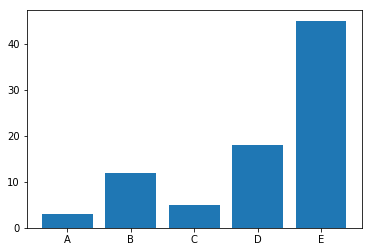

In [17]:
#Code: https://www.python-graph-gallery.com/barplot/

# Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

## Aufgabe 4: Tagging mit NLTK

Auch NLTK enthält Modelle für Textannotationen. Testen Sie die in den NLTK-Kapiteln 3 und 5 beschriebenen Tagger (**POS, Segmentizer, Stemmer, Lemmatizer**) für das Englische aus (wie man einen POS-Tagger mit NLTK selbst trainiert, um etwa auch auf deutschen Texten POS-Tagging mit NLTK durchzuführen, ist Thema in einer späteren Sitzung).

- https://www.nltk.org/book/ch03.html
- https://www.nltk.org/book/ch05.html